<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении заданий, но их не должно быть больше трех.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные скомментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать нздад проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Необходимо добавить вступление (этот пункт есть в блоке курса: Полезные инструкции для учёбы - Оформление проекта - Рекомендации по выполнению проектов):
    	
* заголовок
* краткое описание проекта (желательно своими словами, не копируя из имеющегося описания)
* цель проекта
* описание данных (на усмотрение, данные можно описать в самой работе)
* план работы.

Со вступлением получатель отчета сможет получить общее представление о том, что будет в проекте
</div>  

# Описание проекта
Требуется провести анализ данных о некоторых пользователях из нескольких городов, а также об их поездках для сервиса аренды самокатов GoFast. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

In [159]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка данных

## 1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы

In [160]:
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscription = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

## 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [161]:
display(df_users.head())
display(df_rides.head())
display(df_subscription.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Библиотеки желательно импортировать в отдельной ячейке, чтобы не приходилось, в случае добавления новой библиотеки, загружать еще датасет, что может занять дополнительное время, если объем данных огромный.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Для вывода таблиц лучше использовать display, а не print

Загружены три источника:
- df_users - информация о пользователях сервиса GoFast
- df_rides - информация о поездках пользователей сервиса GoFast
- df_subscription - информация о типах подписок

Краткая информация о структуре данных
- для таблиц **df_users** и **df_rides** есть общая колонка **user_id**, в которой хранится уникальных индекс для каждого пользователя, по этой колонке можно производить join (в смысле sql) для этих двух таблиц
- в таблице **df_subscription** хранится развернутая информация о каждом типе подписки - **free** (без подписки) и **ultra** (собственно подписка)

# 2. Предобработка данных

## 2.1 Приведите столбец date к типу даты pandas

In [162]:
df_rides['date'] = pd.to_datetime(df_rides['date'])

## 2.2 Создайте новый столбец с номером месяца на основе столбца date.

In [163]:
df_rides['month'] = df_rides['date'].dt.month

## 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [164]:
df_rides.info()
df_users.info()
df_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<cl

In [165]:
print('Количество дубликатов в таблице df_users: ', df_users.duplicated().sum())
print('Количество дубликатов в таблице df_rides: ', df_rides.duplicated().sum())
print('Количество дубликатов в таблице df_subscription: ', df_subscription.duplicated().sum())
print('Количество дубликатов в таблице df_users без колонки user_id: ',df_users[['name', 'age', 'city', 'subscription_type']].duplicated().sum())
df_users = df_users.drop_duplicates()
print('Количество дубликатов в таблице df_users после удаления дубликатов: ',df_users.duplicated().sum())

Количество дубликатов в таблице df_users:  31
Количество дубликатов в таблице df_rides:  0
Количество дубликатов в таблице df_subscription:  0
Количество дубликатов в таблице df_users без колонки user_id:  58
Количество дубликатов в таблице df_users после удаления дубликатов:  0


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Следует разделить код по смыслу. Лучше комментировать сразу после кода. Сейчас неочевидно, что комментарии ниже относятся к этому разделу, т.к. идут после заголовка "Предобработка данных", а здесь "Загрузка данных"

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Желательно еще проверить, за какой период имеются данные. Создается столбец с номерами месяцев, если здесь несколько лет, следует это учитывать.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> ответ на Комментарий ревьюера v_2: <a class="tocSkip"> </h2>

Не совсем понял для чего это делать? Номер месяца тут нужен для того, чтобы далее провести группировку по составному индексу user_id + month и посчитать выручку для каждого пользователя в разрезе месяца. Если у него было определеное количество поездок которые занимают период больше года - как это повлияет на групировку - мы все равно группируем помесячно? Допустим у нас будет два месяца июль за разные года - будут две строки с одинаковым значением колонки month=7, мы по ним сделаем группировку и посчитаем общую выручку.

### Пропуски

Пропусков в данных не обнаружено - использовался метод *df.info()* для таблиц
- df_rides
- df_users
- df_subscription

### Дубликаты

Дубликаты искались с помощью метода **duplicated().sum()** и для таблиц **df_rides** и **df_subscription** исследование показало отсутствие дубликатов.

Дубликаты обнаружены только в таблице **df_users** и они искались двумя способами:
- df_users.duplicated().sum()
- df_users[['список полей не включая индекс user_id']].duplicated().sum()


Для этой таблицы:

- df_users.duplicated().sum() = 31
- df_users[['name', 'age', 'city', 'subscription_type']].duplicated().sum() = 58

Второе значение больше - так как есть варианты для пользователей, когда все 4 значения полей **'name', 'age', 'city', 'subscription_type'** идентичны, но индексы ('user_id') тем не менее разные - из чего я делаю выводы что разные индексы говорят о том что это все таки разные пользователи, у которых совпадают все 4 значения вышеприведенных полей. А вот значение *df.duplicated().sum() = 31* говорит о том, что есть 31 дубликат для таблицы df_users у которых совпадают все поля включая индекс 'user_id' (возможно это следствие технической ошибки) и в даннм случае дубликаты можно удалить так как они не несут никакой информации.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ "Пропусков в данных не обнаружено - использовался метод df.info()" - метод info() не был использован.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Не по всем таблицам проверены дубликаты

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Дополнительно можно посмотреть, есть ли в столбце с продолжительностью сессии аномалии. Можно сравнить продолжительность сессий и расстояние поездок и прокомментировать, насколько реально можно проехать такое расстояние за указанное время. В случае обнаружения удалять не рекомендуется, лучше сначала выяснить причину их появления.
</div>  

Примерно понятно как делать - но сейчас жесткий цетйнот по времени надо начинать сборный проект. В следующий раз буду иметь в виду.

# 3. Исследовательский анализ данных

In [166]:
def plot_sub_plots(df, plot_columns):
    fig, axes = plt.subplots(1+len(df.columns)//plot_columns, plot_columns, figsize=(20, 30))
    for col, axis in zip(df.columns, axes.flat):
        df.hist(column = col, ax=axis)

## 3.1 Частота встречаемости городов

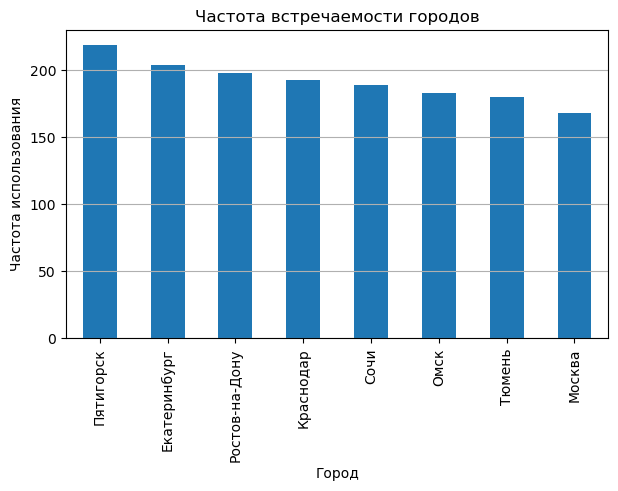

In [167]:
ax = df_users['city'].value_counts().plot(kind="bar", title='Частота встречаемости городов', figsize=(7, 4), xlabel='Город', ylabel='Частота использования')
ax.yaxis.grid(True)
plt.show()

Данные в таблице **df_users** сгруппированы по 8 городам, максимальное количество пользователей в г. Пятигорск, минимальное - в г. Москва. Чем можно объяснить такое распределение? Москва очевидно больше Пятигорска но в данной выборке пользователей из Москвы примерно в полтора раза меньше - я предполагаю что в Москве больше конкурентных сервисов и пользователи распределены между ними.

## 3.2 Соотношение пользователей с подпиской и без подписки

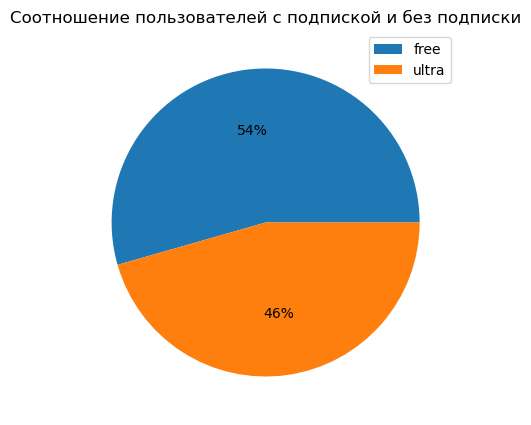

In [168]:
df_subscription_parts = df_users['subscription_type'].value_counts() / df_users['subscription_type'].count()
df_subscription_parts.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(5,5), title='Соотношение пользователей с подпиской и без подписки');

Пользователей без подписки 54%, пользователей с подпиской **ultra** 46%

## 3.3 Возраст пользователей

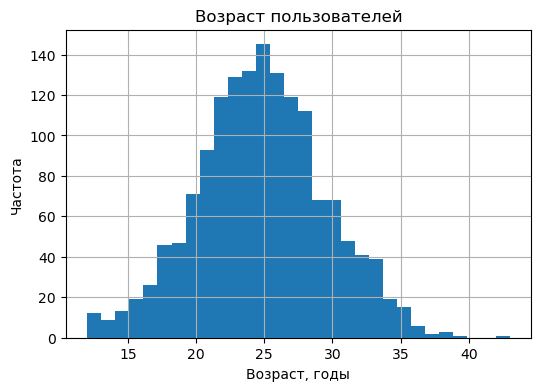

In [169]:
plot1 = df_users['age'].plot(kind='hist', title='Возраст пользователей', bins = 30, grid=True, xlabel='Возраст, годы', ylabel='Частота', figsize=(6, 4))
plt.show()

Гистограмма распределения пользователей по возрастам показывает распределение, близкое к нормальному. **mean** ~ **median** = 25 лет что говорит об отсутствии выбросов. Гистограмма слева не уходит в ноль так как минимальное значение возраста для всей таблицы **df_users** = 12 лет, что вполне правдоподобно. Выбросов гистограмма тоже не показывает.

## 3.4 Расстояние, которое пользователь преодолел за одну поездку

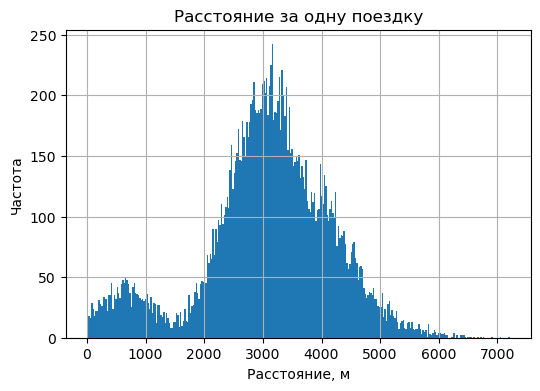

       user_id  distance   duration       date  month
7841       796  7.097072  10.026614 2021-11-26     11
8658       861  6.784447   6.015656 2021-07-21      7
9541       925  2.570787   3.011018 2021-10-19     10
11555     1069  0.855683  10.001902 2021-01-31      1
13690     1223  4.329506   4.008958 2021-05-22      5


In [170]:
plot2 = df_rides['distance'].plot(kind='hist', title='Расстояние за одну поездку', bins = 300, grid=True, xlabel='Расстояние, м', ylabel='Частота', figsize=(6, 4))
plt.show()
print(df_rides[df_rides['distance'] < 10])

Гистограмма распределения таблицы **df_rides** по колонке *distance* показывает основной пик в районе 3000 м и дополнительный пик в районе 700 м. Ошибочных значений, которые могли бы увести распределение влево я не увидел так как минимальные 5 значений этого поля все больше нуля - то нет явно ошибочных значений равных 0. Выбросов гистограмма тоже не показывает. Причины вторичного максимума пока непонятны и требуют дополнительного анализа, возможно с построением гистограмм, сгруппированным по городам.

## 3.5 Продолжительность поездок

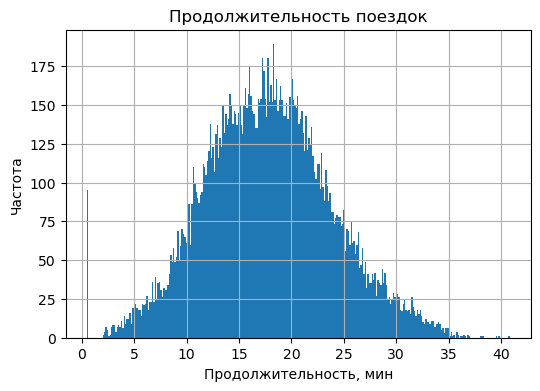

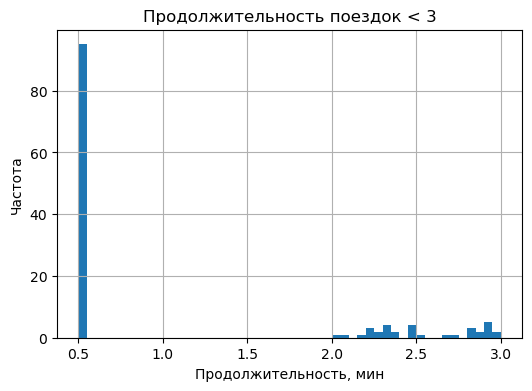

In [171]:
plot2 = df_rides['duration'].plot(kind='hist', title='Продолжительность поездок', bins = 300, grid=True, xlabel='Продолжительность, мин', ylabel='Частота', figsize=(6, 4))
plt.show()
plot4 = df_rides[df_rides['duration'] < 3]['duration'].plot(kind='hist', title='Продолжительность поездок < 3', bins = 50, grid=True, xlabel='Продолжительность, мин', ylabel='Частота', figsize=(6, 4))
plt.show()

Гистограмма распределения таблицы **df_rides** по колонке *duration* имеет форму, близкую к нормальному распределению с медианой и средним ~ 17 мин, но имеет место выраженный пик в районе близком к нулю (но не равный нулю). Дополнительная гистогррамма для поездок с длительностью меньше чем 3 мин показала, что длительность со значениями менее чем 2 мин в данных обрезана и эти данные все перемещены в бин со значением = 0.5 мин и таких значений 95. Эти данные относятся к разным пользователям и значение *distance* для них отличны от 0.

Я предполагаю, что для таких записей произошло искажение значения *duration* с установкой его в 0.5 и так как установить реальное значение *duration* не представляется возможным я предлагаю пока оставить это как есть и посмотреть на эти данные в разрезе подписок и городов в следующем разделе - после этого можно будет принять решение - оставить их как есть, заполнить значение *duration* нулем или просто удалить все такие записи.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ В jupyter не принято писать всё в одной ячейке. Нужно будет разбить на отдельные по смыслу. Это замечание касается и раздела "Исследовательский анализ данных"

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Цитирую из урока "Рекомендации по выполнению проектов": "Ячейки помогают сделать алгоритм решения более понятным. Не пытайтесь уместить всё в одной, но и на каждый «чих» создавать ячейку тоже не нужно. Одна ячейка — один важный шаг. Полезно сопровождать каждую ячейку коротким пояснением её назначения". Код нужно будет разбить. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Не хватает подписи на оси X. Графики лучше подписывать на русском в проекте на русском языке.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Не хватает визуализации к пункту "Частота встречаемости городов". Здесь можно построить линейчатую диаграмму (столбчатую диаграмму с горизонтальными столбцами). Важно также сортировать значения и добавлять название графика и подписи осей (это замечание актуально для всех визуализаций).
</div>

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Также необходимо добавить визуализацию к пункту "Соотношение пользователей с подпиской и без подписки". Здесь лучше подойдет диаграмма, позволяющая показать отношение частей к целому. На диаграмме должны быть подписи с долями.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ По возрасту, расстоянию и продолжительности графики подходящие, всё прокомментировано.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ После объединения стоит проверить и написать, прошло ли оно корректно, не были ли потеряны данные или не появились ли лишние записи. Совпадает ли количество записей с одной из исходных таблиц? Имеются ли пропуски?

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Я бы советовал для двух датайфреймов строить не отдельные графики, а совместить их в одной визуализации. В итоге, получится одна визуализация, показывающая распределение расстояния с разбивкой по пользователям с подпиской и без, и аналогичная визуализация, но показывающая распределение времени поездок. [Здесь](https://overcoder.net/q/42473/%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D1%8C%D1%82%D0%B5-%D0%B4%D0%B2%D0%B5-%D0%B3%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%8B-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE-%D1%81-%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E-matplotlib) есть примеры.
    
Также рекомендуется использовать функцию `describe()` на этом шаге.
</div>

# 4. Объединение данных

## 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм

In [172]:
df_ur = df_users.merge(df_rides)
df_all = df_ur.merge(df_subscription)
display(df_all.head())
df_all.info()
print('Количество дубликатов для общей таблицы: ', df_all.duplicated().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB
Количество дубликатов для обще

Данные из трех источников объединены в один dataframe df_all, дубликатов и пропусков нет.

## 4.2 Создайте ещё два датафрейма из df_all - c данными о пользователях с подпиской и без

In [173]:
df_all_with_subscription = df_all[df_all['subscription_type'] == 'ultra']
df_all_without_subscription = df_all[df_all['subscription_type'] == 'free']
display(df_all_with_subscription.head())
display(df_all_without_subscription.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Созданы dataframes **df_all_with_subscription** и **df_all_without_subscription**

## 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

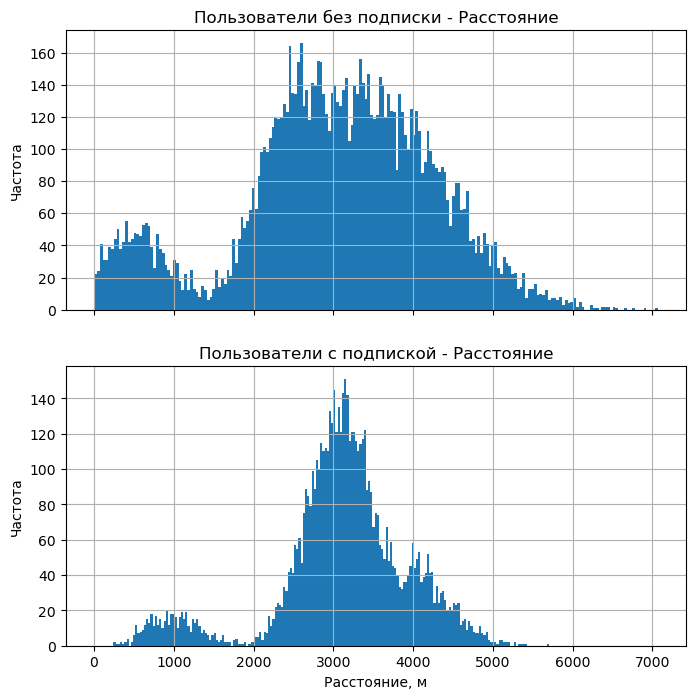

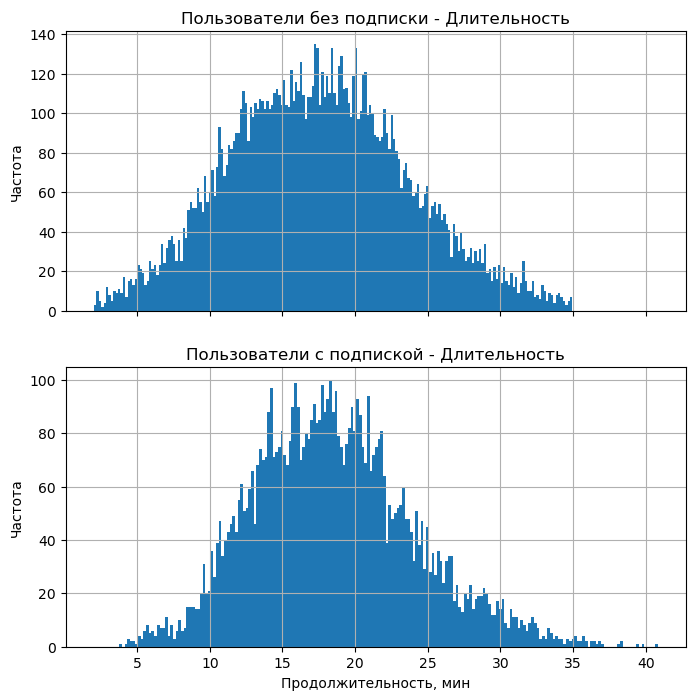

In [174]:
fig1, axes1 = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(8,8))
fig2, axes2 = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(8,8))
axes1[0].set_title('Пользователи без подписки - Расстояние')
axes2[0].set_title('Пользователи без подписки - Длительность')
axes1[1].set_title('Пользователи с подпиской - Расстояние')
axes2[1].set_title('Пользователи с подпиской - Длительность')
axes1[1].set_xlabel('Продолжительность, мин')
axes1[1].set_ylabel('Частота')
bins = 200
df_all_without_subscription = df_all_without_subscription.loc[df_all_without_subscription['duration'] != 0.5]
df_all_without_subscription['distance'].plot(kind='hist', bins = bins, grid=True, ax = axes1[0], ylabel='Частота')
df_all_with_subscription['distance'].plot(kind='hist', bins = bins, grid=True, ax = axes1[1], xlabel='Расстояние, м', ylabel='Частота')
df_all_without_subscription['duration'].plot(kind='hist', bins = bins, grid=True, ax = axes2[0], ylabel='Частота')
df_all_with_subscription['duration'].plot(kind='hist', bins = bins, grid=True, ax = axes2[1], xlabel='Продолжительность, мин', ylabel='Частота');

Из данной визуализации видно, что для пользователей без подписки значения продолжительности поездки менее чем 2 мин отсутствуют и присутствует ряд значений которые равны == 0.5 мин что приводит к появлению четкого выброса слева у гистограммы **All users without subscription - Duration**. Я это связываю с технической ошибкой и удаляю эти данные - их количество 95. После удаления выброс на гистограмме пропал. (Наличие выброса показано в 3.5)

Общий вид диаграмм Duration близок к нормальному - есть максимум в районе 17 мин и этому значению примерно равны медиана и среднее.
Что касается диаграмм Distance - то тут помимо основного максимума в районе 3000 м есть и вторичный максимум в районе 1000 м для пользователей с подпиской и 500 м для пользователей без подписки. Кроме того, для полльзователей без подписки диаграмма расстояния прижата к левой оси - то есть есть какое то количество поездок с очень малым расстоянием - но не равным 0 (то есть это не техническая ошибка).

# 5 Подсчёт выручки

## 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и добавьте туда столбец с помесячной выручкой, которую принёс каждый пользователь

In [175]:
df_all['revenue'] = df_all.apply(lambda row: row.loc['start_ride_price'] + row.loc['minute_price'] * np.ceil(row.loc['duration']), axis = 1)
df_all_grouped = pd.pivot_table(df_all,
               index=["user_id", "month"],
               values=["distance", "duration", "revenue", "name", "subscription_fee"],
               aggfunc={"distance": "sum", "duration": ["sum", len], "name" : "first", "subscription_fee" : "first", "revenue" : "sum"})
df_all_grouped.columns = ["distance", "count", "duration", "name", "revenue", "subscription_fee"]
df_all_grouped["revenue"] = df_all_grouped["revenue"] + df_all_grouped["subscription_fee"]
display(df_all_grouped.head())

distance  count   duration  name  revenue  subscription_fee
user_id month                                                                
1       1      7027.511294      2  41.416640  Кира    451.0               199
        4       754.159807      1   6.232113  Кира    241.0               199
        8      6723.470560      2  44.776802  Кира    475.0               199
        10     5809.911100      2  31.578017  Кира    391.0               199
        11     7003.499363      3  53.397424  Кира    535.0               199

Создан датафрейм df_all_grouped с агрегированными данными о поездках на основе датафрейма с объединёнными данными df_all. Группировка по паре: user_id, month. Добавлены колонки:

distance - аггрегированное расстояние в метрах
count - количество поездок
duration - аггрегированное время в минутах
name - имя текущего пользователя
revenue - суммарная выручка для данного пользователя в месяц с учетом наличия или отсутствия подлписки
subscription_fee - стоимость ежемесячного платежа

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Всё верно. Выручка рассчитана корректно👍

# 6. Проверка гипотез

## 6.1 Выгодны ли пользователи с подпиской для компании?

In [176]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = df_all_without_subscription['duration']
sample_2 = df_all_with_subscription['duration']
results = st.ttest_ind(sample_2, sample_1, alternative="greater")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Порядок выборок неверный. Сначала с подпиской, потом без подписки в статметоде.

- Нулевая гипотеза - пользователи с подпиской в среднем тратят на одну поездку то же время, что и пользователи без подписки
- Альтернативная гипотеза - пользователи с подпиской в среднем тратят на одну поездку больше времени чем пользователи без подписки

Принимаем уровень статистической значимости alpha = 0.05
### Результат
Рассчитаное значение p-value для данных выбророк = 4.704468074453899e-28 и меньше, чем принятый уровень статистической значимости - то есть нулевая гипотеза отвергнута. Таким образом, пользователи с подпиской в среднем тратят больше времени на поездки чем пользователи без подписки. Ответить на вопрос выгодны ли компании пользователи с подпиской можно будет только проведя исследование в п 6.3

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ О том, как формулируются гипотезы, есть в уроке "Формулирование гипотез" в теме "Проверка гипотез" раздела "Статистический анализ данных". Гипотезы нужно будет скорректировать.  

## 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

In [177]:
optimal_distance = 3130

sample = df_all_with_subscription['distance']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    sample, 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


- Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку в среднем равно 3130 метров
- Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров

Принимаем уровень статистической значимости alpha = 0.05
### Результат
Рассчитаное значение p-value для данных выбророк = 0.92 и больше чем принятый уровень статистической значимости - то есть не получилось отвергнуть нулевую гипотезу. Таким образом, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и является оптимальным с точки зрения износа самоката - то есть износ самоката будет минимален для пользователей с подпиской.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Гипотеза была сформулирована, как "больше", а в тесте указано "less". Необходимо изменить аргумент в параметре alternative.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Стоит прокомментировать после внесения изменений выше, является ли расстояние поездок оптимальным с точки зрения износа самоката. 

## 6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [178]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
sample_1 = df_all_grouped[df_all_grouped['subscription_fee'] == 0]['revenue']
sample_2 = df_all_grouped[df_all_grouped['subscription_fee'] != 0]['revenue']

results = st.ttest_ind(sample_2, sample_1, alternative="greater")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Нужно поменять местами выборки пользователей с подпиской и без подписки.

- Нулевая гипотеза - средняя помесячная выручка от пользователей с подпиской по месяцам равна средней помесячной выручке от пользователей без подписки.
- Альтернативная гипотеза - средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки

Принимаем уровень статистической значимости alpha = 0.05
### Результат
Рассчитаное значение p-value для данных выбророк = 1.8850394384715216e-31 и меньше чем принятый уровень статистической значимости - то есть мы отвергли нулевую гипотезу. Таким образом, средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки - таким образом пользователи с подпиской действительно более выгодны компании чем пользователи без подписки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Гипотезы также нужно доработать. Нулевая - это альтернативная на самом деле, а нулевую нужно будет изменить. 

## 6.4 Будет ли количество обращений в техподдержку от пользователей ниже после обновления серверов, с которыми взаимодействует мобильное приложение?

- Нулевая гипотеза - среднее количество обращений в техподдержку от пользователей после обновления серверов в среднем равно среднему количеству обращений до обновления серверов
- Альтернативная гипотеза - среднее количество обращений в техподдержку от пользователей после обновления серверов в среднем ниже среднего количества обращений до обновления серверов

# Выводы

- пользователи с подпиской в среднем тратят времени на одну поездку больше чем пользователи без подписки
- учитывая, что наиболее оптимальное для износа самоката расстояние для одной поездки = 3130 м и среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров можно сказать, что для пользователей с подпиской износ самокатов будет минимален
- средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки

### Общий вывод
Пользователи с подпиской в целом более выгодны для компании чем пользователи без подписки. Сейчас доля клиентов с подпиской меньше половины. Вывод - надо стараться увеличить их процентное отношение.
И еще вызывает вопрос почему по частоте использования Москва занимает среди городов самое последнее место - это город с большим населением и с большим числом потенциальных клиентов. Необходимо увеличивать количество клиентов с подпиской в Москве.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Речь идет о наборе данных до и после изменений, какой статтест стоит выбрать? Об этом есть в уроке "Гипотеза о равенстве средних для зависимых (парных) выборок".
    
Гипотезы не совсем верно сформулированы. В уроке, который я упомянул выше, есть о том, какой должна быть нулевая и альтернативная гипотезы.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ "Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось". Это альтернативная гипотеза. Какая должна быть гипотеза, односторонняя или двухсторонняя?

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ В итоговом выводе необходимо написать, какие данные были рассмотрены, выявлены ли пропуски и дубликаты, какие результаты получены в шагах 3, 4 и 6. Также стоит резюмировать, являются ли пользователи с подиской более выгодными для сервиса аренды самокатов.

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
Проект не подготовлен для проверки. Сейчас он выглядит, как черновик. Много кода в одной ячейке, что не принято делать в jupyter. Не структурирована работа, в частности, выводы написаны не в том же разделе, где был написан код. Есть раздел "Подсчёт выручки", но он пустой, а выручка была рассчитана до этого (также и в других разделах). Необходимо подготовить проект в соответствии со структурой, разбить код по смыслу. Жду твой проект на повторное ревью!)

Владимир я не согласен с таким выводом что я меня выводы не написаны в том же разделе где был написан код. При формировании ноутбука я придерживался следующей системы  - а именно: то, что в описании проекта описано как Шаг1, Шаг2, и тд - у меня в маркдауне это заголовки 1го уровня и у меня под каждой секцией кода соответствующего определенному шагу расположена секция Markdown которая начигается с соответствущего заголовка 1го уровняю. Далее в этой секции расположены заголовки 2го уровня - 1.1, 1.2 и тд и в каждом указаны выводы по данной секции. Если нужно написать общий вывод я напишу но на мою работу может быть рнадо сначала посмотреть ?
Спасибо

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>
  
Cтруктуру я бы советовал доработать. Прежде всего, это нужно не для нас, а для тебя, чтобы твою работу могли прочитать, чтобы было проще взаимодействовать с заказчиком. Т.е., сначала заголовок шага, затем код и комментарии к нему. Это привычный для многих формат. Что касается кода, его обязательно нужно будет разбить. Без этого проект не будет принят. Жду проект)

Хорошо я все таки для себя определю стандарт оформления ноутбука:

-  Введение
-  Шаги проекта оформленные как markdown header 1го уровня - например **2.Предобработка данных**
-  Внутри каждого шага промежуточные задачи как заголовки 2го уровня (если они есть)- например 
   - **2.1 Приведите столбец date к типу даты pandas**
   - **2.2 Создайте новый столбец с номером месяца на основе столбца date**
   - **2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах.** 
- Сначала идет заголовок 1го уровня в ячейке Markdown, потом - если есть - заголовок второго уровня в ячейке Markdown, потом код на Python, потом описание этого шага в ячейке Markdown
- Выводы
- Импорты вверху в отдельной ячейке
- Ну и чтобы минимизировать код я уберу всякие дополнительные выдачи типа df.info и df.describe которые я делал для себя

Если есть какие то дополнения - просьба написать - пока буду его придерживаться.

По статметодам все исправил - там были неправильные формулировки и вызовы методов - недоучил